# Commuting Cost Analysis in Helsinki Region

As a resident of the Helsinki area I was interested which mode of transportation is more cost-efficient for commuting within Helsinki region (including municipalities of Helsinki, Espoo, and Vantaa). Means of transportation considered are: private car, DriveNow car sharing service, public transport, and Taxi service. Approximate distance of 50 km is assumed to be the width of the region from east to west as well as North to South. In the following I discuss each mode of transport, followed by graphs depicting cost of commuting as a function of distance. Three different average speeds assumed simulating different traffic conditions. Finally, results are discussed around three user cases derived from my own experience. 

### CAR 
Calculation of expenses of going from point A to point B by private car depends on many variables such as the car itself (its annual expenses and fuel consumption), how busy are the routes you have to use, etc. In addition, getting to destination by own car means you need to park it somewhere, which adds parking fees. I simplified the model, assuming only moving costs. The cost estimates for a car in this analysis are based on my own car - Volvo (1999 model year). Below are parameters I used: <br>
<b>Total annual expense of the car</b> includes regular bills (tax, Insurance, technical inspection), maintenance and repairs. <br>
<b>Fuel Consumption</b> of the car is not constant and depends on several factors including  technical specifications of the car, traffic, weather, and your driving style. I accounted for part of them by linking fuel consumption directly to the average speed. Specifically, minimum and maximum of the consumption values provided by manufacturer (for highway and city respectively) are mapped to average speeds ranging between 10 and 70km/h. Estimates of 10 and 70 are not based on any statistical analysis, but rather represent a rule of thumb estimates of the most extreme average speeds you can achieve, given the speed limits within the region. Although travelling over 70km/h is possible (e.g. Ring roads and on highways  have limits of 80 or 100km/h), combined length of those is a fraction the rest of the road surface with the speed limit of 40km/h. Therefore, in practice 70km/h is highly exaggerated estimate of average speed for majority routes. 
To address variability of traffic condition I estimated costs by assuming different average speeds. From my experience 30km/h is a good average speed estimate when substantial section of the route between origin and destination has 80km/h speed limit, but I also did calculations for 20km/h (busy traffic) and 40km/h.  

### Public Transport 
Helsinki municipality public transport consists of Buses, Trams, Metro, and commuter trains. Here I consider only city of Espoo, city of Helsinki, and city of Vantaa as three municipalities in Helsinki region. Travel fares are defined by zones. Traveling within the borders of one municipality is possible by 1 zone or internal ticket. Crossing between any two municipalities require 2 zone regional ticket, regardless of the distance. The following tickets are included here:<br>
<b>single internal ticket</b> using personal travel card – €2.20 <br>
<b>Single 2 zone Region ticket </b> using personal travel card – €4.20 <br>
(source https://www.hsl.fi/en/tickets-and-fares/travel-card)
Since I own a car, I pay for its insurance and tax, regardless of which transport I use. Therefore, I added daily portion of the fixed annual insurance and tax bills to public transport ticket costs. I must stress here that I am not adding maintenance and repair expenses.   

### Drive Now
This is a car sharing service which is like simplified and hassle-free rental of BMW-s and Mini-s. Basically they charge from €0.46 per minute (fuel cost included) depending on models. They also offer cheaper options for longer rentals (3 hours or more). Therefore, cost of getting from A to B by DriveNow is only a function of how long will the trip take. As with the buses, I add my daily share of insurance and tax bills here.

### Taxi
I assumed the service prices for weekdays from 6am-8pm for one or two persons. They charge base price of €5.90 + €1.60 per km. This model does not include waiting time, which is very expensive. 
Source: https://taksihelsinki.fi/en/book-a-taxi/taxi-fares/

## Disclaimer

I realize and acknowledge that this analysis does not take into conideration environment, what is optimal for urban traffic flow, or any other general factors. Please note that I am not promoting private cars here. If you look at the bigger picture, it is obvious that in any aspect the most efficient transport for moving large masses of people is public transport. However, as an Espoo resident living < 15km away from Helsinki city center, I personally feel that public transport is a bit too expensive, and in many situations of my daily life, too uncomfortable to be chosen due to environmental concerns. I decided to do this analysis to see if my feelings are backed up by data. With this clarified, lets look at some numbers.   

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize: input all necessary information here

FuelCons = [7 ,12]                         # fuel consumption highway(min)  and town(max) L per 100km
FuelPrice = 1.45                         # how much 1L fuel costs
TotalExpCar = 1200                      #'how much do you spend on a car annually including regular bills and repairs/services 
InsTaxCar = 700                         #'only fixed tax+insurance
PubTrCostInt = 2.20                     # Internal single ticket
PubTrCostReg = 4.20                     # single 2zone regional ticket
PubTrCostPer = 106.5/30                 # 30 day 2 zone regional ticket
DrvNowCostMin = 0.46                     # 'DriveNow price per min'
dist=list(range(1,51))                  # range of distances in km



Equipped with all necessary information we can proceed with the comparison analysis. 

<IPython.core.display.Javascript object>


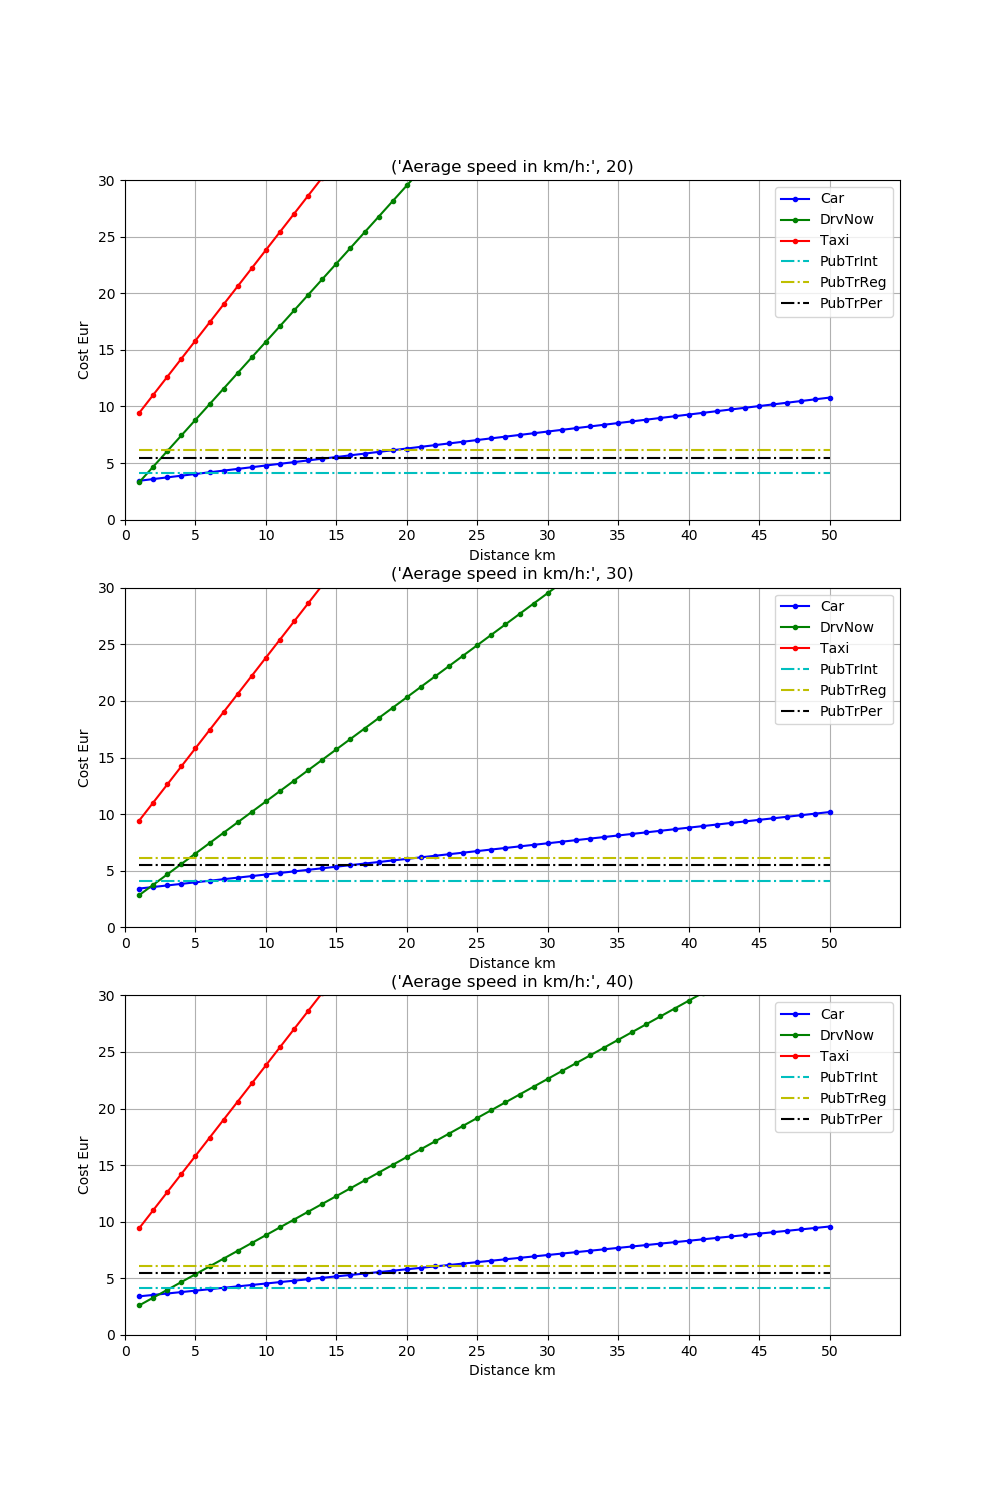

In [5]:
# First, lets define couple of functions 
FuelConsRange = max(FuelCons) - min(FuelCons)
Scaling = np.round(FuelConsRange/60,3)   #here I assume that average speed in Helsinki region can range between 10km/h up to 70km/h.  

def EstFC(FuelCons,AvgSpeed,Scaling):
    # rough estimate of fuel consumption based on average speed
    FuelConsEst = max(FuelCons) - AvgSpeed*Scaling 
    return FuelConsEst

def CostAnalysis(dist, AvgSpeed,FuelConsEst,FuelPrice,InsTaxCar,TotalExpCar, DrvNowCostMin):
    # estimate costs as a function of distance
    TrCostCar = []
    TrCostTaxi = []
    TrCostDrvNow =[]
    DrvNowCostHr= DrvNowCostMin*60
    for d in range(1,max(dist)+1):
        TrCostCar.append(TotalExpCar/365 + (FuelConsEst/100 * d)*FuelPrice)
        TrCostTaxi.append(5.90 + d*1.60 + InsTaxCar/365)
        TrCostDrvNow.append(d/AvgSpeed*DrvNowCostHr+InsTaxCar/365) 
    return TrCostCar, TrCostTaxi,TrCostDrvNow


# In[] Visualization

%matplotlib notebook
from IPython.core.pylabtools import figsize
figsize(10, 15) 
plt.figure()
count = 0

# The script below iteratively estimates costs for disserent transports at different average speed and plot the results

for AvgSpeed in [20, 30, 40]:
    
    FuelConsEst = EstFC(FuelCons,AvgSpeed,Scaling)
    [TrCostCar, TrCostTaxi,TrCostDrvNow] = CostAnalysis(dist, AvgSpeed,FuelConsEst,FuelPrice,InsTaxCar,TotalExpCar, DrvNowCostMin)
    
    count = count + 1
    index = 310 + count
    plt.subplot(index)
    
    plt.plot(dist,TrCostCar,'b.-')
    plt.plot(dist,TrCostDrvNow,'g.-')
    plt.plot(dist,TrCostTaxi,'r.-')

    plt.plot(dist,InsTaxCar/365 + PubTrCostInt*np.ones(max(dist)),'c-.')
    plt.plot(dist,InsTaxCar/365 + PubTrCostReg*np.ones(max(dist)),'y-.')
    plt.plot(dist,InsTaxCar/365 + PubTrCostPer*np.ones(max(dist)),'k-.')

    # some formatting
    plt.title(('Aerage speed in km/h:', AvgSpeed))
    plt.xlabel('Distance km')
    plt.ylabel('Cost Eur')
    plt.legend(['Car','DrvNow','Taxi','PubTrInt','PubTrReg','PubTrPer'])
    plt.xticks(np.arange(0,51,5))
    plt.xlim(0,55)
    plt.ylim(0,30)
    plt.grid()



    


## Results
As we see from the figures, and unsurprisingly, taxi is the most expensive option you can choose. It is normal - extra comfort comes with a price tag. In Helsinki, Taxi is not the transport you would typically choose for daily commuting and it will not be discussed further. 
As the figures above show, public transport (PT) is not what you would can call cheap either. I am not aware of an average distance of commuting within Helsinki region, but even for the cheapest possible ticket (cyan line), private car remains competitive option for around 5-6km long trips, regardless of how busy the streets are. DriveNow service depends only on time, which means even for relatively short distances, your average speed between origin and destination will significantly affect the cost. However, it has the advantage that you can just drop off the car near your destination and pick up another one (possibly from another place) on your way back, i.e. no parking fees. Lets consider a few user cases derived from my own daily routines and see how costs and flexibility compare. 

### User case 1: 
Adult commuting weekly for to pursue a hobby. I live in Espoo and the destination is 16.5km away in Helsinki. To cover the distance twice (roundtrip) by PT, it takes at least 4 changes and on average 140 minutes. And 2 x Two Zone regional ticket. As I mentioned above, I add daily share of my fixed car-related bills to other modes of transport costs, because I pay those bills even if I don't use car. Overall, PT (PubTrReg line on the plot) would cost me the ticket price for a round trip (€4.20x2) + daily share of the car insurance and tax (€1.92) = €10.32. 30 day period ticket (PubTrPer in the figures) is cheap only if used very frequently. 
By car, round trip of 33km takes up to 45min, depending on the traffic, corresponding to around 44km/h average speed. Parking is free. Lets look at the bottom plot (Avg speed 40). By car 33km @40km/h will be about €7.40. DriveNow would cost about €25. 
So each visit will cost ~€3 more by PT, three times longer commuting and 4 transport changes. Don't even get me started about ridiculous bus schedules at late afternoons/evenings for some of the lines. Now, as any rational person with some common sense, I think car does not have an alternative in this case. 

### User Case 2:
Taking child to a hobby. Destination is located 12.1km away in Espoo. Round trip by PT takes 95 minutes on average. The trip costs 2 x €2.20(internal ticket, adult) + 2 x €1.10 (child) = €6.6. By car 24.2km round trip takes 30 minutes and costs around €6.30 (check any of the bottom two plots). Parking is free, so the prices for the bus and the car are very close. However, I spare at least 30 minute time from the actual trips by car. Again, add the fact that buses have scedules, which are not always frequent, and you can easily add 5-15 minutes to the trip. Private car wins again.   

### User Case 3:
To get from Espoo to Helsinki city center by PT, I need on average 35min to cover the distance of around 12km. The same trip takes 15-25 minutes by car, depending on the traffic conditions. It is because 9km of the route consists of 80km/h highway section.  Now lets look at middle plot (30km/h average speed) to see which option is cheaper for getting to the city center. PT costs €6.12 as shown above. Same trip would cost around €5 by car, €13 by DriveNow, and over €25 by Taxi (see the figure). As we see the trip itslef is still a bit cheaper by car. The gap further increases in favor of the car when more passengers are added, because increase in fuel consumption by adding couple more passengers will be insignificant compared to the increase in PT expenses. On the other hand, depending on where in Helsinki are you going, when, and how long you will need to park the car, PT can quickly regain an advantage as the most cost-efficient mode of transprtation. In short, there is no clear winner when commuting involves going through and/or parking in central Helsinki. Here are few examples when PT does not have an alternative in time- and cost-efficiency:
-Daily commuting to a workplace located in Helsinki city center. 
-Long routes going along commuter train path. For example, central railway station to airport. 
-Routes crossing entire central Helsinki with the busiest streets during rush hour, especially if tram or metro is an option.-moving about a lot withing city center.

 
### Conclusions
The user cases showed that PT is not always a sensible alternative in terms of time- or cost-efficiency when it comes to commuting within the Helsini region. As a driver myself living in Espoo, I do not think I can swap steering wheel with a travel card without making my everyday life miserable. Consideing the fact that my car is more expensive to maintain and consumes more fuel than some of the more modern cars (especially hybrids), I would have even less motivation for permanently switching to PT as an owner of a newer car. However, I can see myself using car sharing services significantly more when it is widespread enough. I can already think of the situations where despite of a higher cost per km, DriveNow is cheaper alternative to a private car  with almost the same flexibility and comfort. 
To conclude, these results are not meant to be generalized for all residents of Helsinki region. Rather, this is more personal view of how transportation onptions compare for an average Espoo resident, backed up with data from user cases. I am sure some people will relate to it and others will not. I am open to hearing comments, thoughts and criticism.  
